In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

len(x_train)


In [3]:
x_train.shape


(60000, 28, 28)

In [4]:
x_test.shape


(10000, 28, 28)

In [5]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

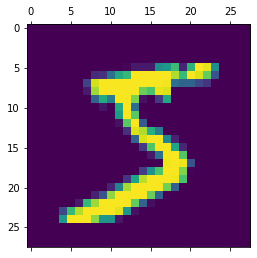

In [6]:
plt.matshow(x_train[0])

In [7]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x_train, 
y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6390 - accuracy: 0.8418 - val_loss: 0.3594 - val_accuracy: 0.9036
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.9051 - val_loss: 0.2994 - val_accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2915 - accuracy: 0.9180 - val_loss: 0.2647 - val_accuracy: 0.9239
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9266 - val_loss: 0.2427 - val_accuracy: 0.9303
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2373 - accuracy: 0.9337 - val_loss: 0.2246 - val_accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2183 - accuracy: 0.9389 - val_loss: 0.2080 - val_accuracy: 0.9402
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2020 - accuracy: 0.9433 - val_loss: 0.1949 - val_accuracy:

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9507
Loss=0.163
Accuracy=0.951


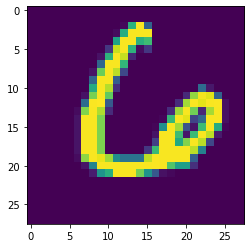

In [12]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [13]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 6


In [14]:
history.history??

In [15]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

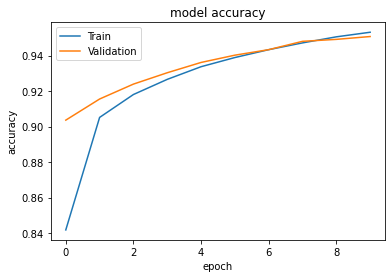

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

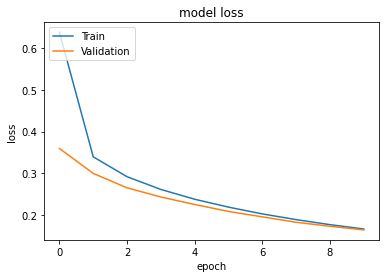

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


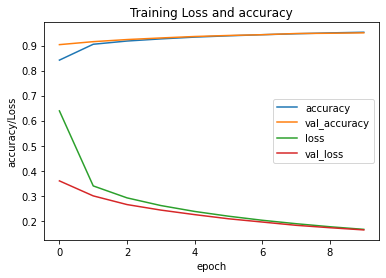

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


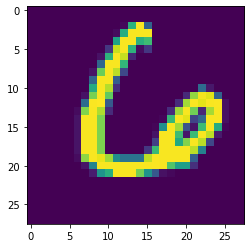

[1.4447204e-02 1.1558869e-07 3.4948983e-04 1.4242236e-06 4.7457350e-05
 3.3641452e-05 9.8510104e-01 1.1529243e-05 1.5333524e-06 6.5853046e-06]


In [19]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print(predicted_value[n])